In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import csv

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smart-farming-sensor-data-for-yield-prediction/Smart_Farming_Crop_Yield_2024.csv


# Data Loading And Preprocessing

In [2]:
df = pd.read_csv('/kaggle/input/smart-farming-sensor-data-for-yield-prediction/Smart_Farming_Crop_Yield_2024.csv')
df.head()

,farm_id,region,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,...,sowing_date,harvest_date,total_days,yield_kg_per_hectare,sensor_id,timestamp,latitude,longitude,NDVI_index,crop_disease_status
0,FARM0001,North India,Wheat,35.95,5.99,17.79,75.62,77.03,7.27,NaN,...,2024-01-08,2024-05-09,122,4408.07,SENS0001,2024-03-19,14.970941,82.997689,0.63,Mild
1,FARM0002,South USA,Soybean,19.74,7.24,30.18,89.91,61.13,5.67,Sprinkler,...,2024-02-04,2024-05-26,112,5389.98,SENS0002,2024-04-21,16.613022,70.869009,0.58,NaN
2,FARM0003,South USA,Wheat,29.32,7.16,27.37,265.43,68.87,8.23,Drip,...,2024-02-03,2024-06-26,144,2931.16,SENS0003,2024-02-28,19.503156,79.068206,0.80,Mild
3,FARM0004,Central USA,Maize,17.33,6.03,33.73,212.01,70.46,5.03,Sprinkler,...,2024-02-21,2024-07-04,134,4227.80,SENS0004,2024-05-14,31.071298,85.519998,0.44,NaN
4,FARM0005,Central USA,Cotton,19.37,5.92,33.86,269.09,55.73,7.93,NaN,...,2024-02-05,2024-05-20,105,4979.96,SENS0005,2024-04-13,16.568540,81.691720,0.84,Severe


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   farm_id               500 non-null    object 
 1   region                500 non-null    object 
 2   crop_type             500 non-null    object 
 3   soil_moisture_%       500 non-null    float64
 4   soil_pH               500 non-null    float64
 5   temperature_C         500 non-null    float64
 6   rainfall_mm           500 non-null    float64
 7   humidity_%            500 non-null    float64
 8   sunlight_hours        500 non-null    float64
 9   irrigation_type       350 non-null    object 
 10  fertilizer_type       500 non-null    object 
 11  pesticide_usage_ml    500 non-null    float64
 12  sowing_date           500 non-null    object 
 13  harvest_date          500 non-null    object 
 14  total_days            500 non-null    int64  
 15  yield_kg_per_hectare  5

In [4]:
df.isna().sum()

farm_id                   0
region                    0
crop_type                 0
soil_moisture_%           0
soil_pH                   0
temperature_C             0
rainfall_mm               0
humidity_%                0
sunlight_hours            0
irrigation_type         150
fertilizer_type           0
pesticide_usage_ml        0
sowing_date               0
harvest_date              0
total_days                0
yield_kg_per_hectare      0
sensor_id                 0
timestamp                 0
latitude                  0
longitude                 0
NDVI_index                0
crop_disease_status     130
dtype: int64

In [5]:
df['irrigation_type'].value_counts()

irrigation_type
Sprinkler    121
Manual       118
Drip         111
Name: count, dtype: int64

In [6]:
df['crop_disease_status'].value_counts()

crop_disease_status
Severe      133
Mild        125
Moderate    112
Name: count, dtype: int64

> This code is used for filling the NaN values present in the dataset.
>
> Mainly focus on the two columns `crop_disease_status`, `irrigation_type`
>
> NaN replce by the values present in the dataset.

In [7]:
columns_to_fill = ['crop_disease_status', 'irrigation_type']

for col in columns_to_fill:
    nan_count = df[col].isna().sum()
    unique_values = df[col].dropna().unique()
    
    if len(unique_values) == 0 or nan_count == 0:
        continue  # Skip if nothing to fill or no values to use
    
    # Generate replacement values equally distributed
    replacements = (list(unique_values) * ((nan_count // len(unique_values)) + 1))[:nan_count]
    
    # Replace NaNs
    df.loc[df[col].isna(), col] = replacements



print(df['irrigation_type'].value_counts())
print('---------------------------------------')
print(df['crop_disease_status'].value_counts())


irrigation_type
Sprinkler    171
Manual       168
Drip         161
Name: count, dtype: int64
---------------------------------------
crop_disease_status
Severe      176
Mild        169
Moderate    155
Name: count, dtype: int64


In [8]:
df.isna().sum()

farm_id                 0
region                  0
crop_type               0
soil_moisture_%         0
soil_pH                 0
temperature_C           0
rainfall_mm             0
humidity_%              0
sunlight_hours          0
irrigation_type         0
fertilizer_type         0
pesticide_usage_ml      0
sowing_date             0
harvest_date            0
total_days              0
yield_kg_per_hectare    0
sensor_id               0
timestamp               0
latitude                0
longitude               0
NDVI_index              0
crop_disease_status     0
dtype: int64

# Vizualization Section

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# BOX PLOT

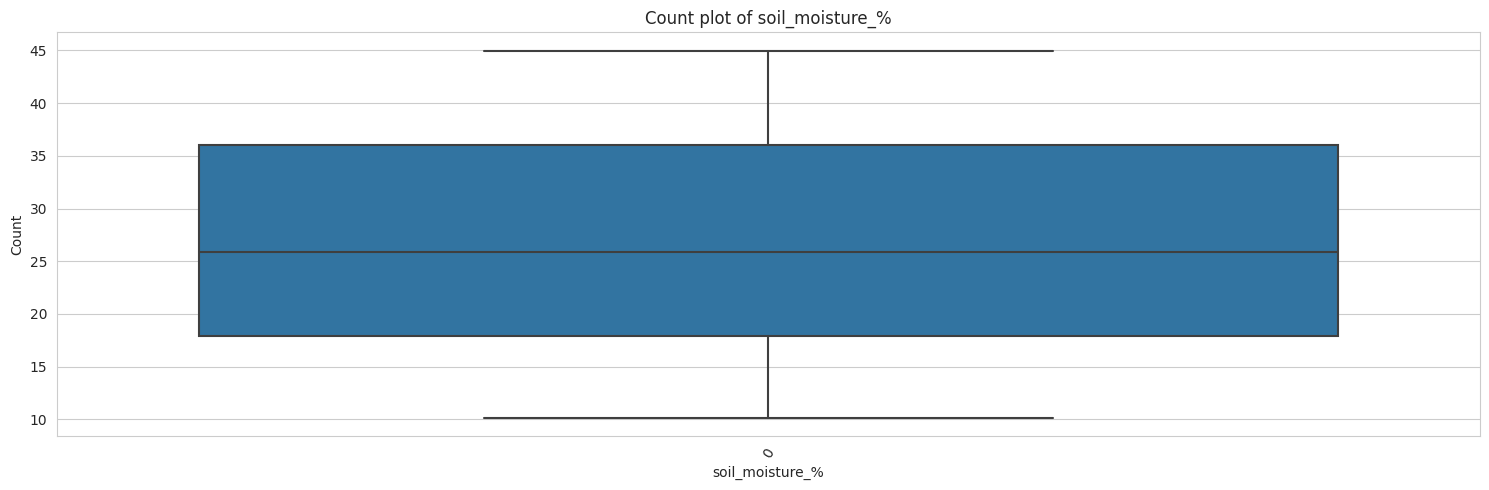

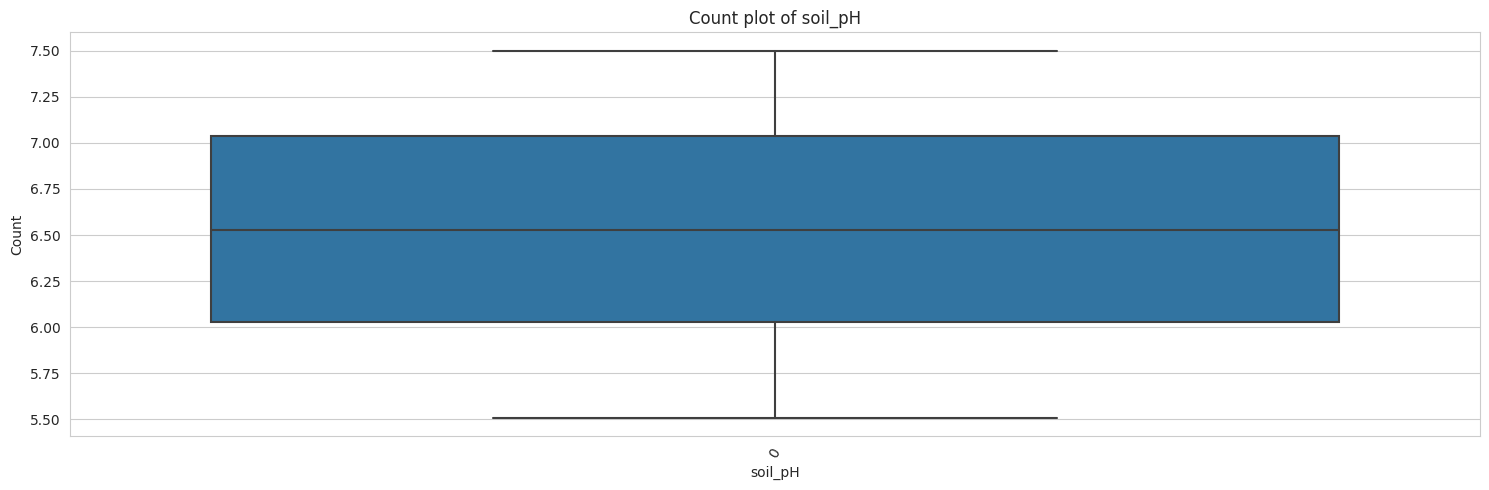

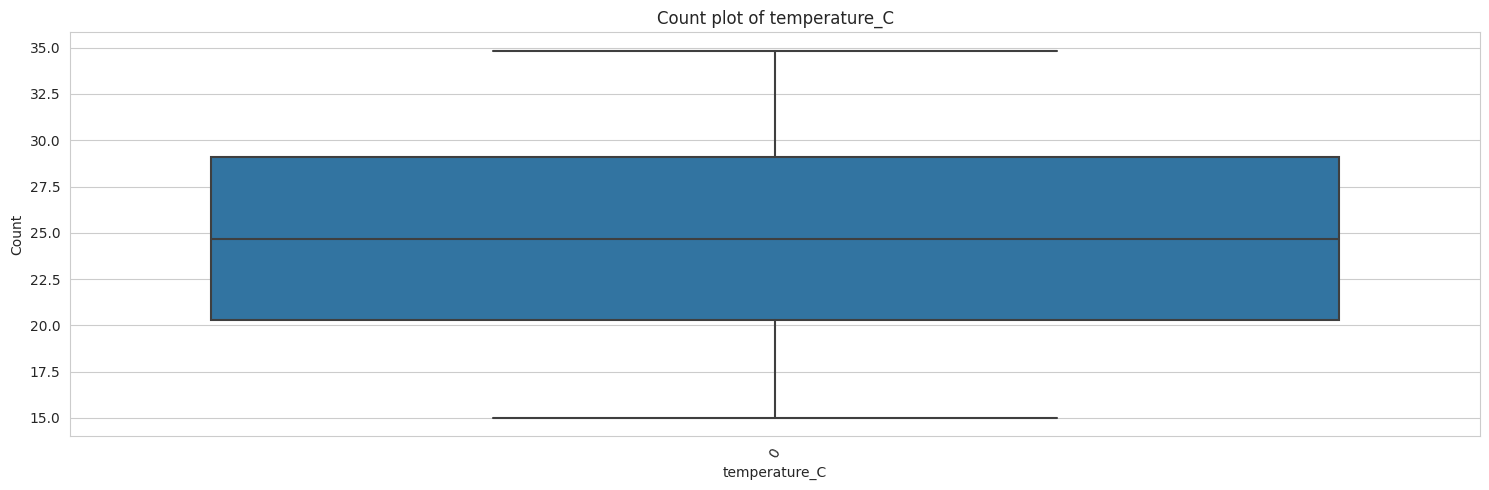

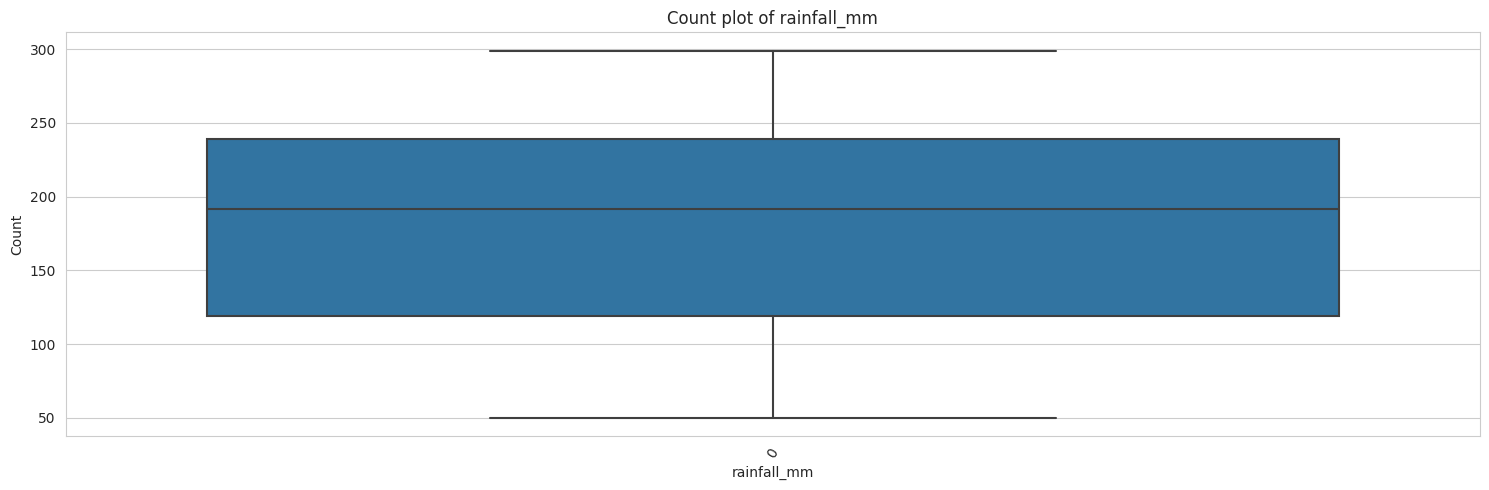

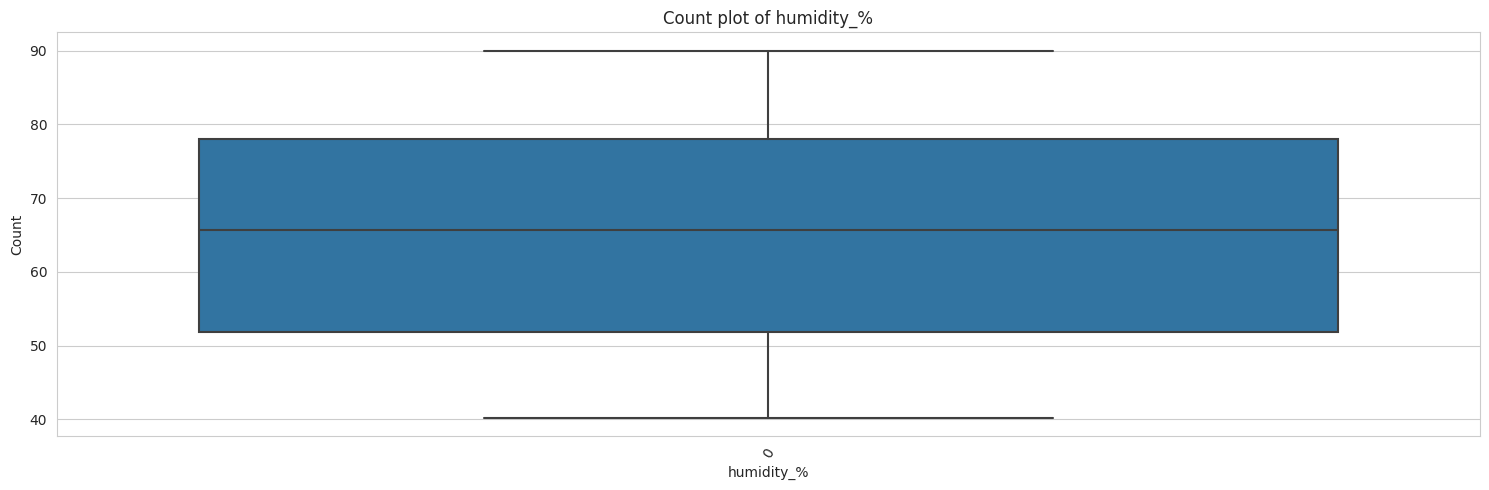

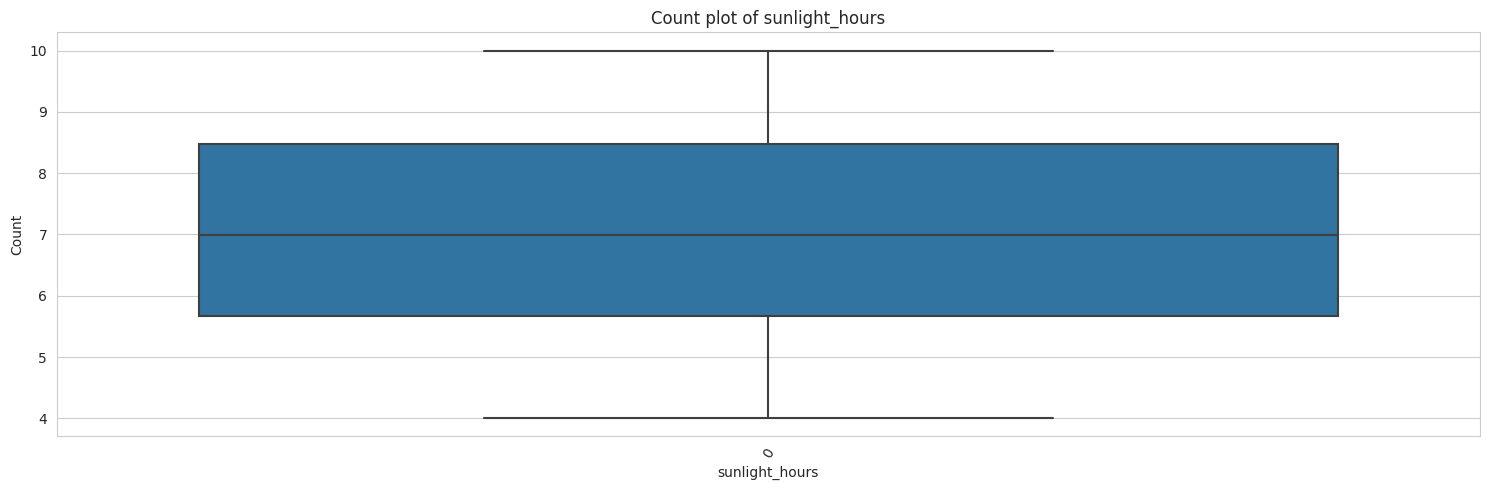

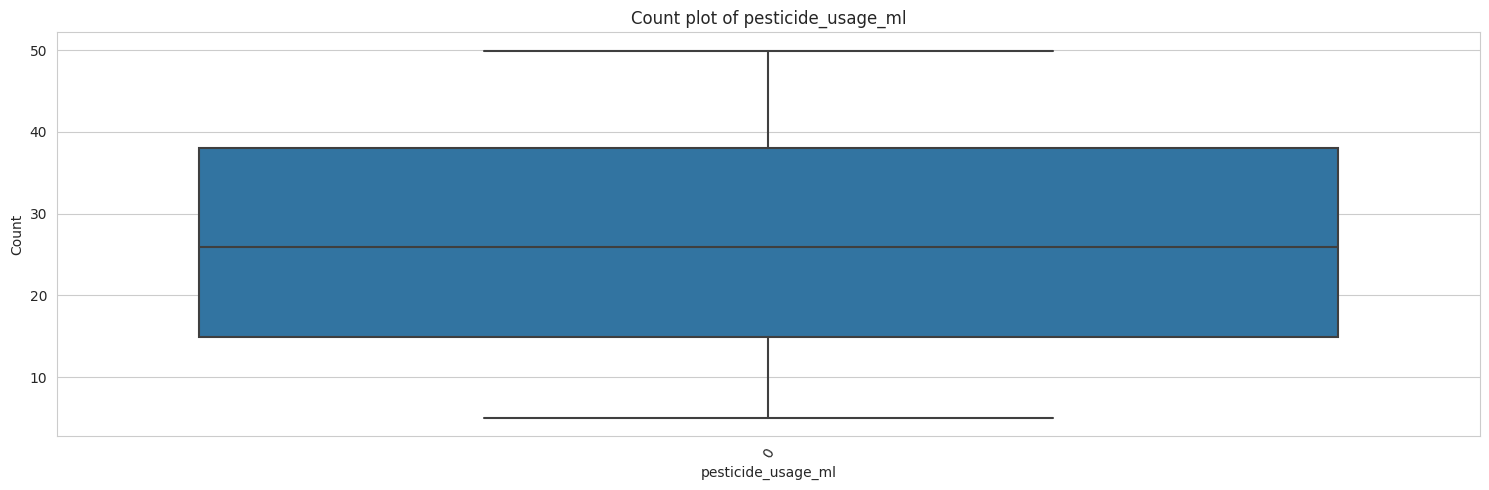

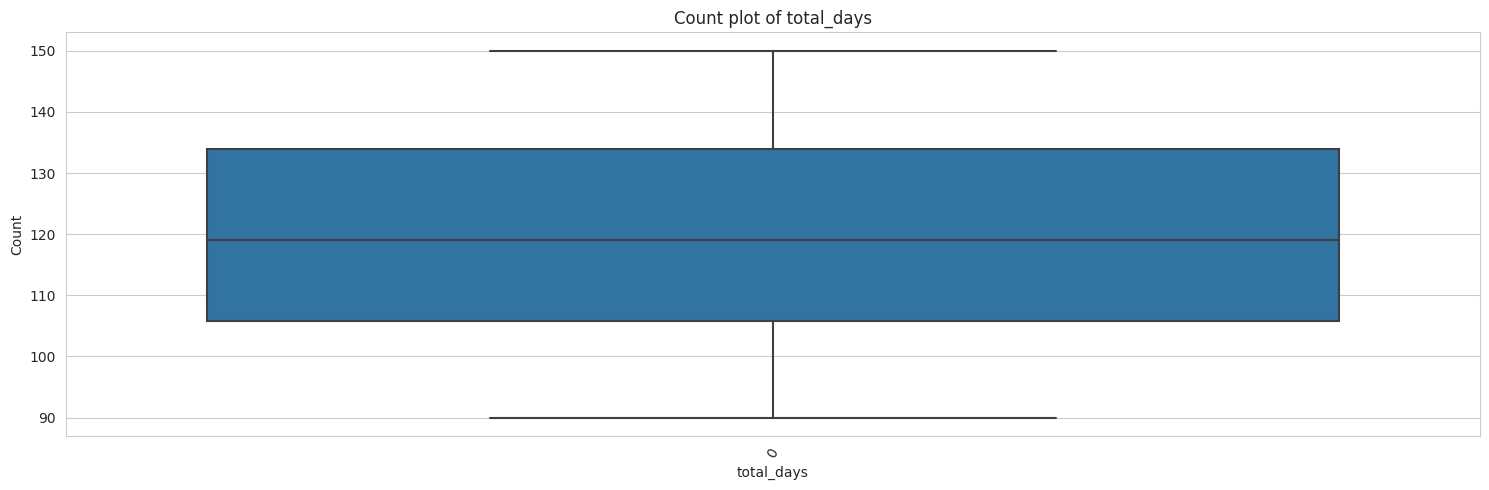

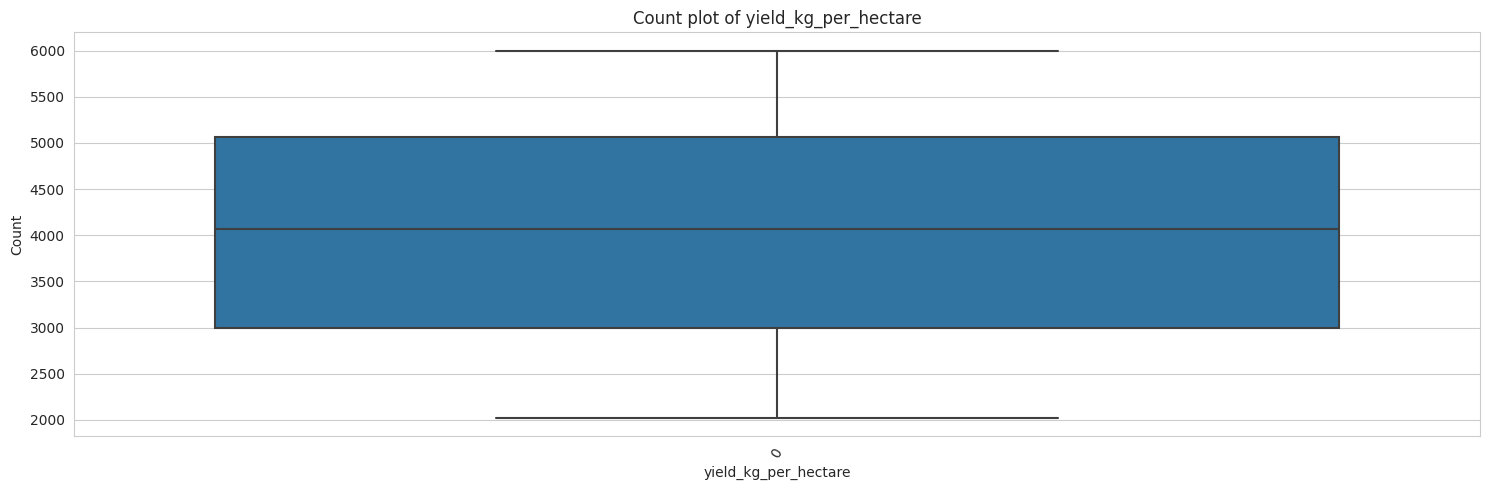

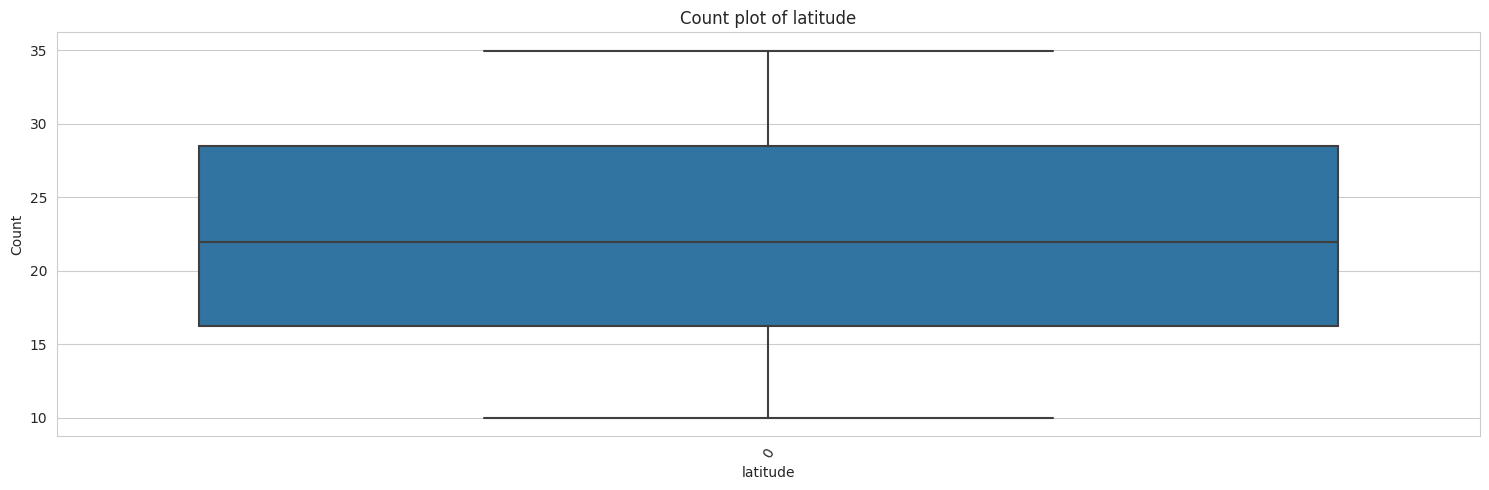

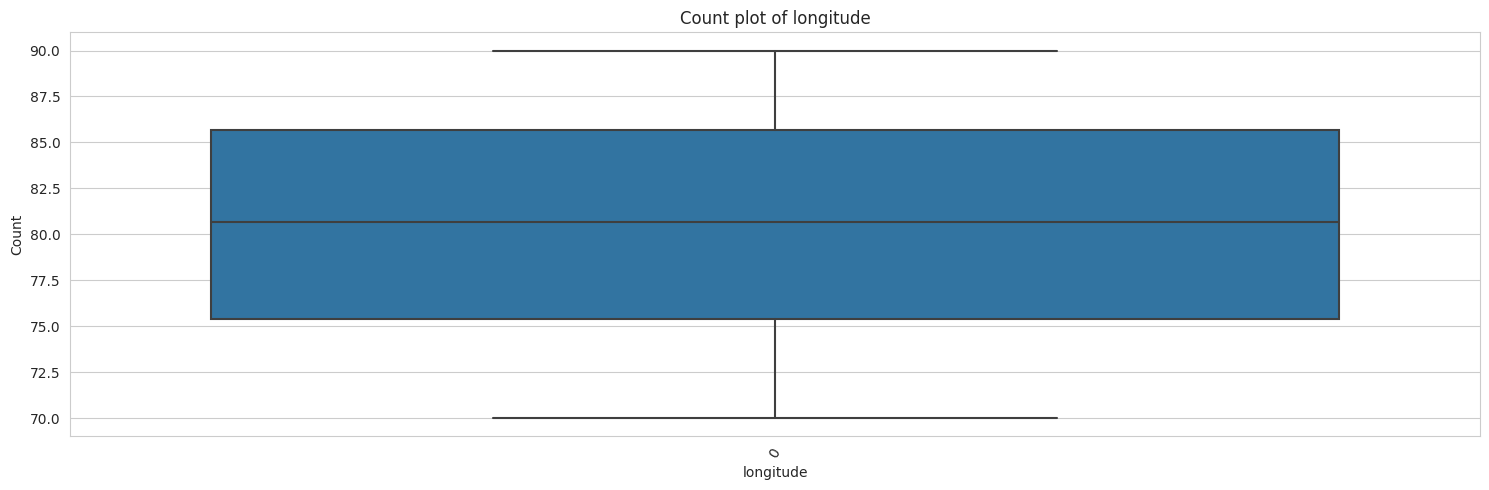

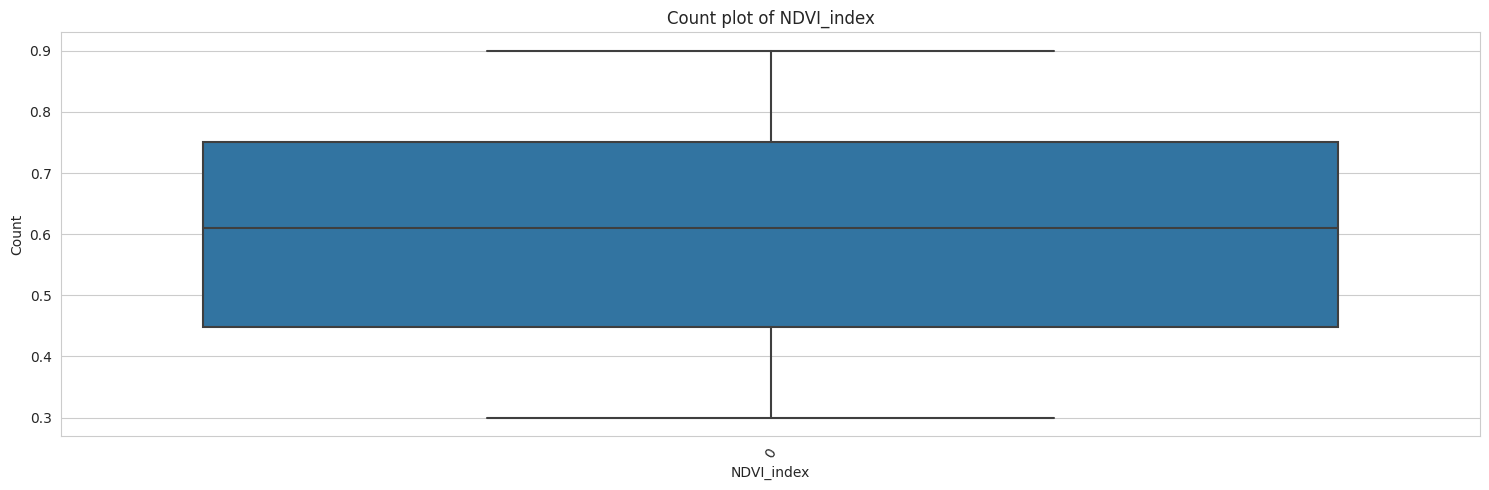

In [10]:
num_cols = df.select_dtypes(include=['float64','int64']).columns
for features in num_cols:
    if features in df.columns:
        plt.figure(figsize=(15,5))
        sns.boxplot(df[features].dropna())
        plt.title(f'Count plot of {features}')
        plt.xlabel(features)
        plt.ylabel('Count')
        plt.xticks(rotation=60)
        plt.tight_layout()
        plt.show()

**What a Box Plot Shows:**

> Median (Q2) →
    The line inside the box. It splits the dataset into two equal halves.

> Interquartile Range (IQR) →
    The box spans from the first quartile (Q1) to the third quartile (Q3).
    This represents the middle 50% of your data.

> Whiskers →
    The "lines" extending from the box show the range of data within 1.5 × IQR from the quartiles.

> * Lower whisker: lowest data point ≥ Q1 - 1.5×IQR

> * Upper whisker: highest data point ≤ Q3 + 1.5×IQR

> Outliers →
    Data points outside the whiskers are plotted as individual dots or symbols. These are your outliers.

# HISTOGRAM

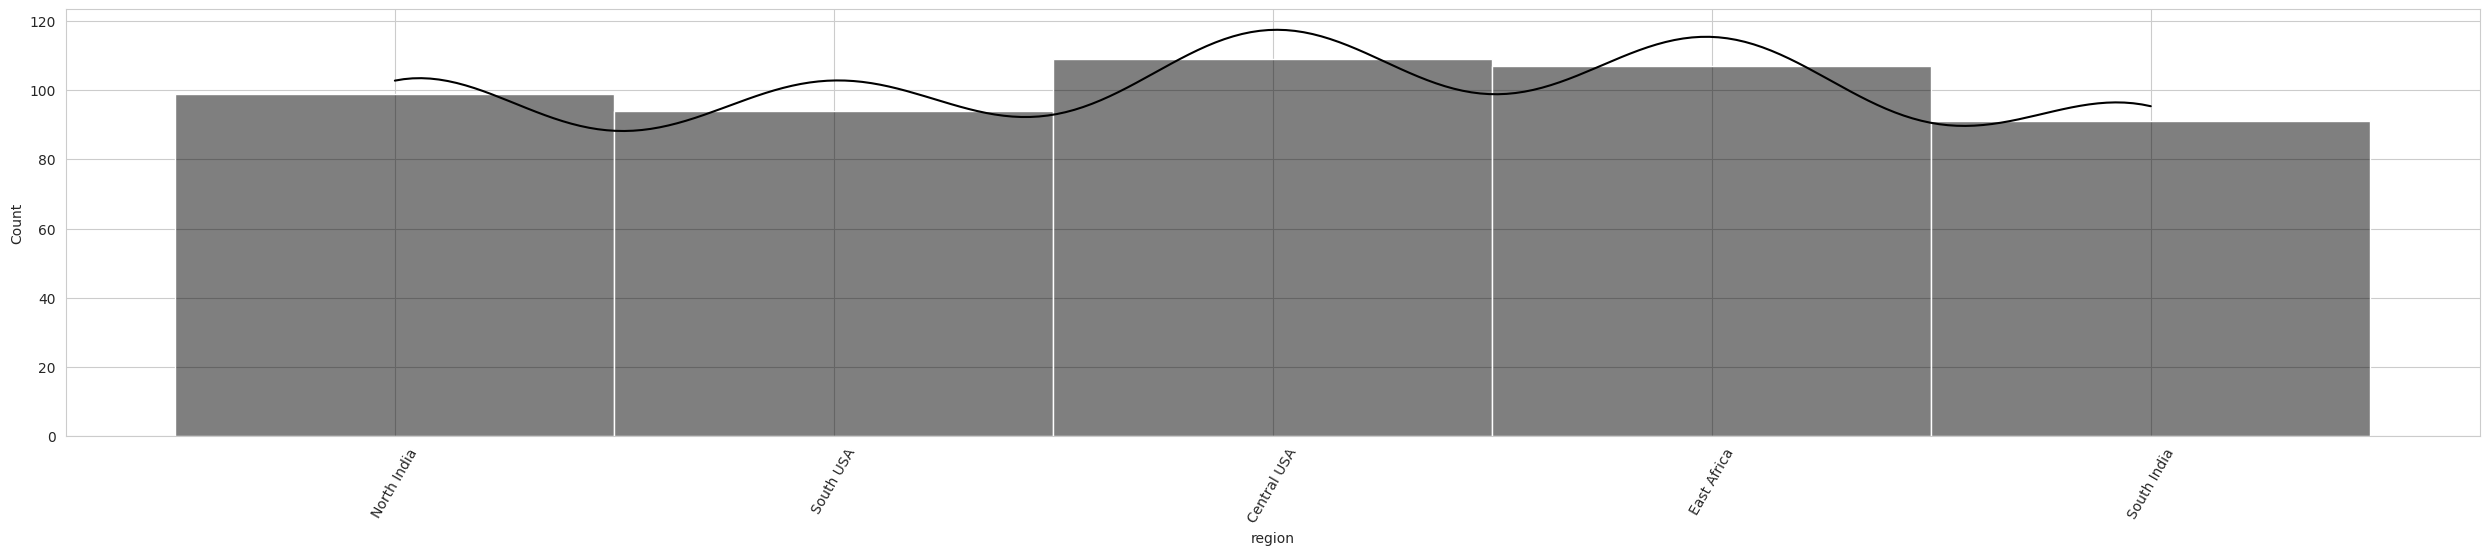

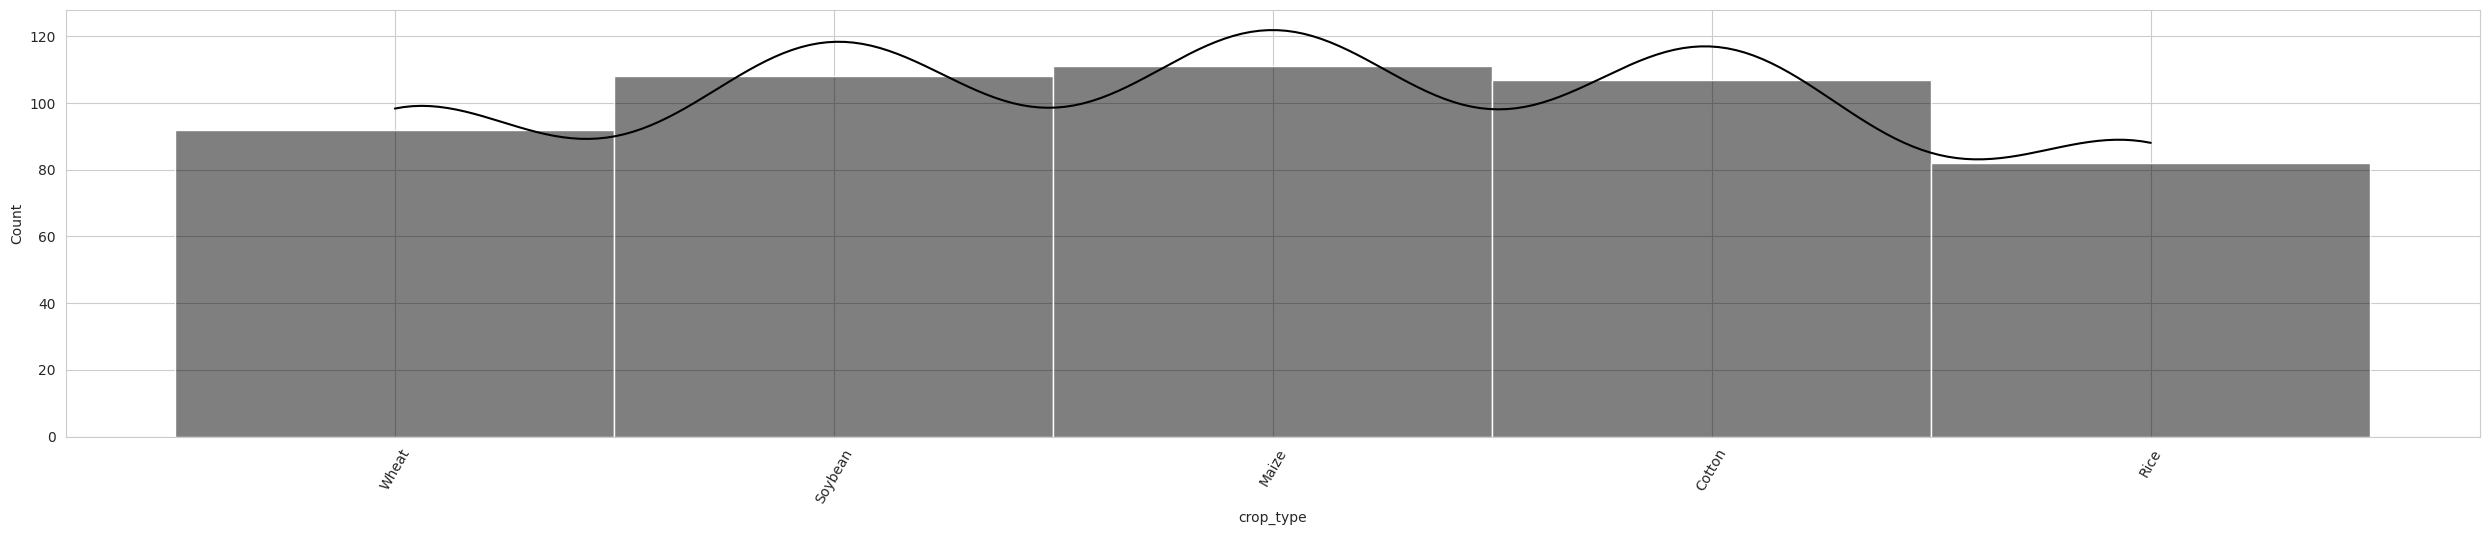

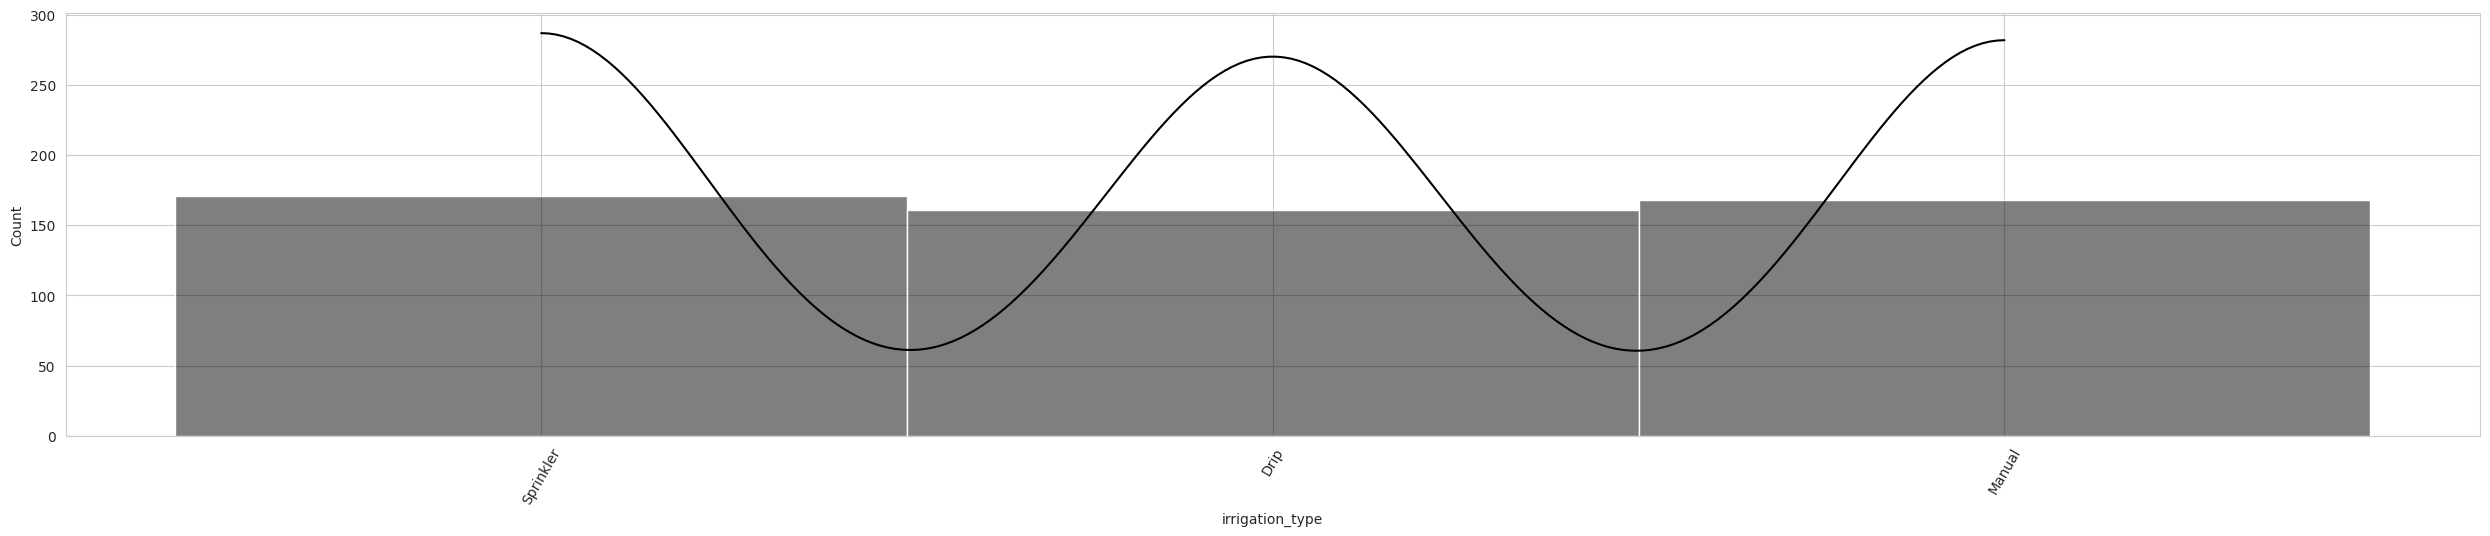

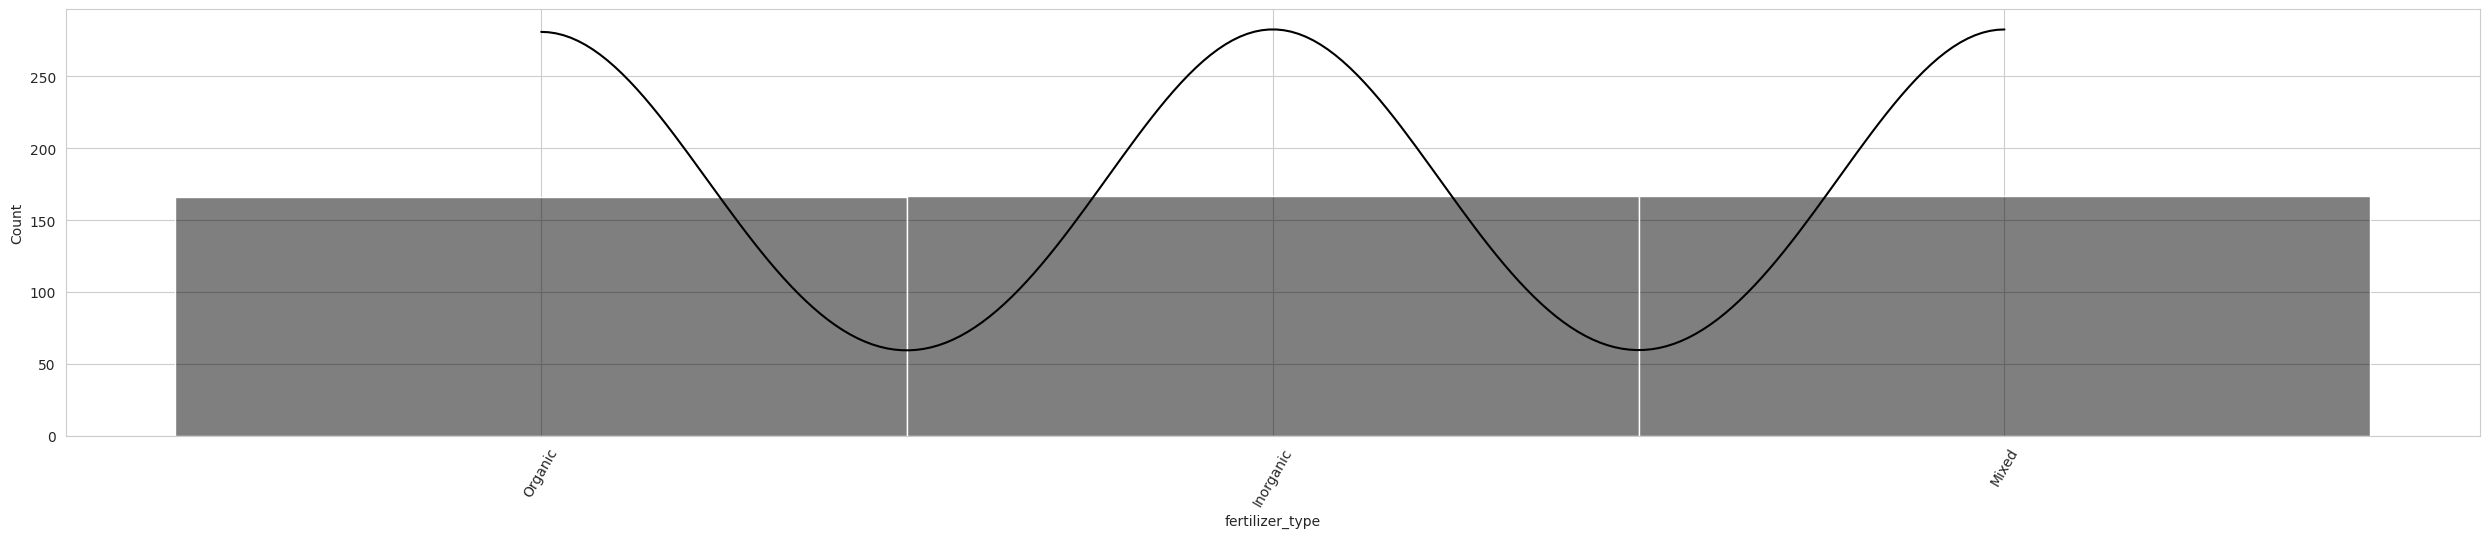

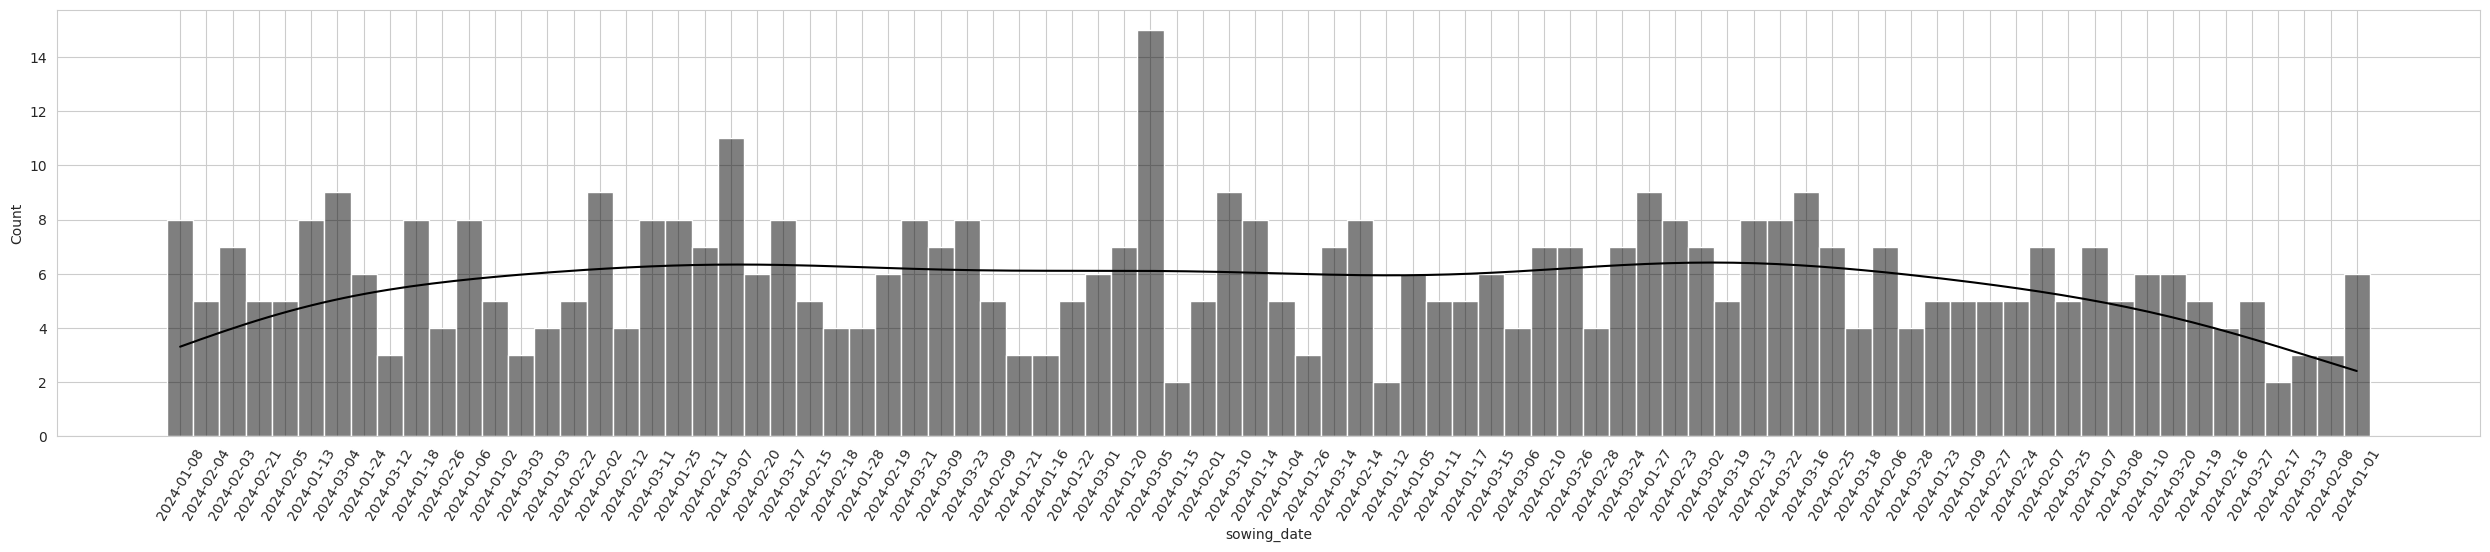

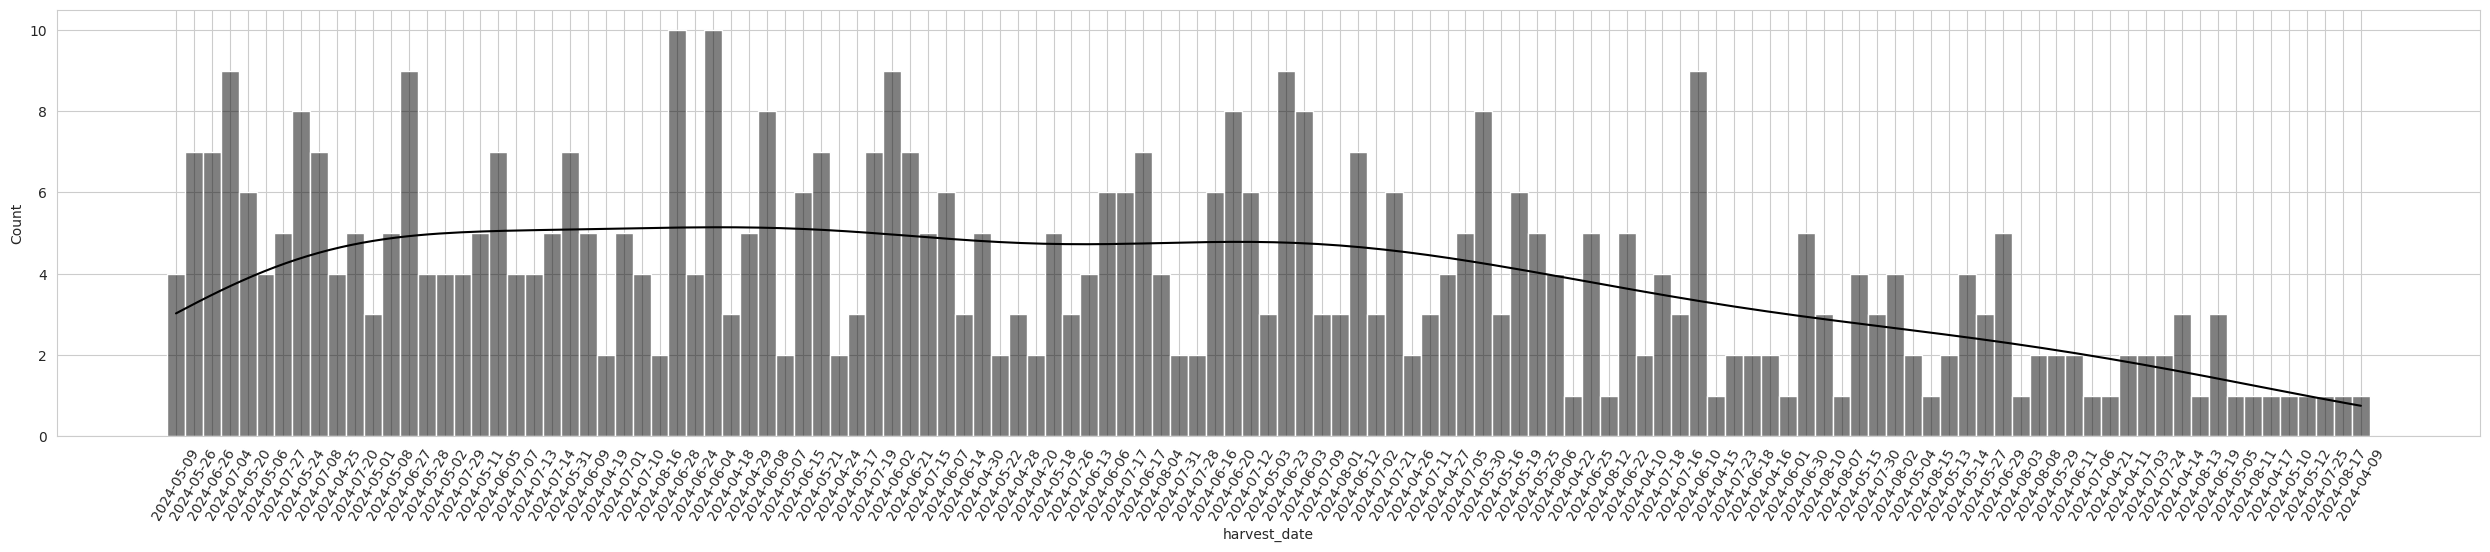

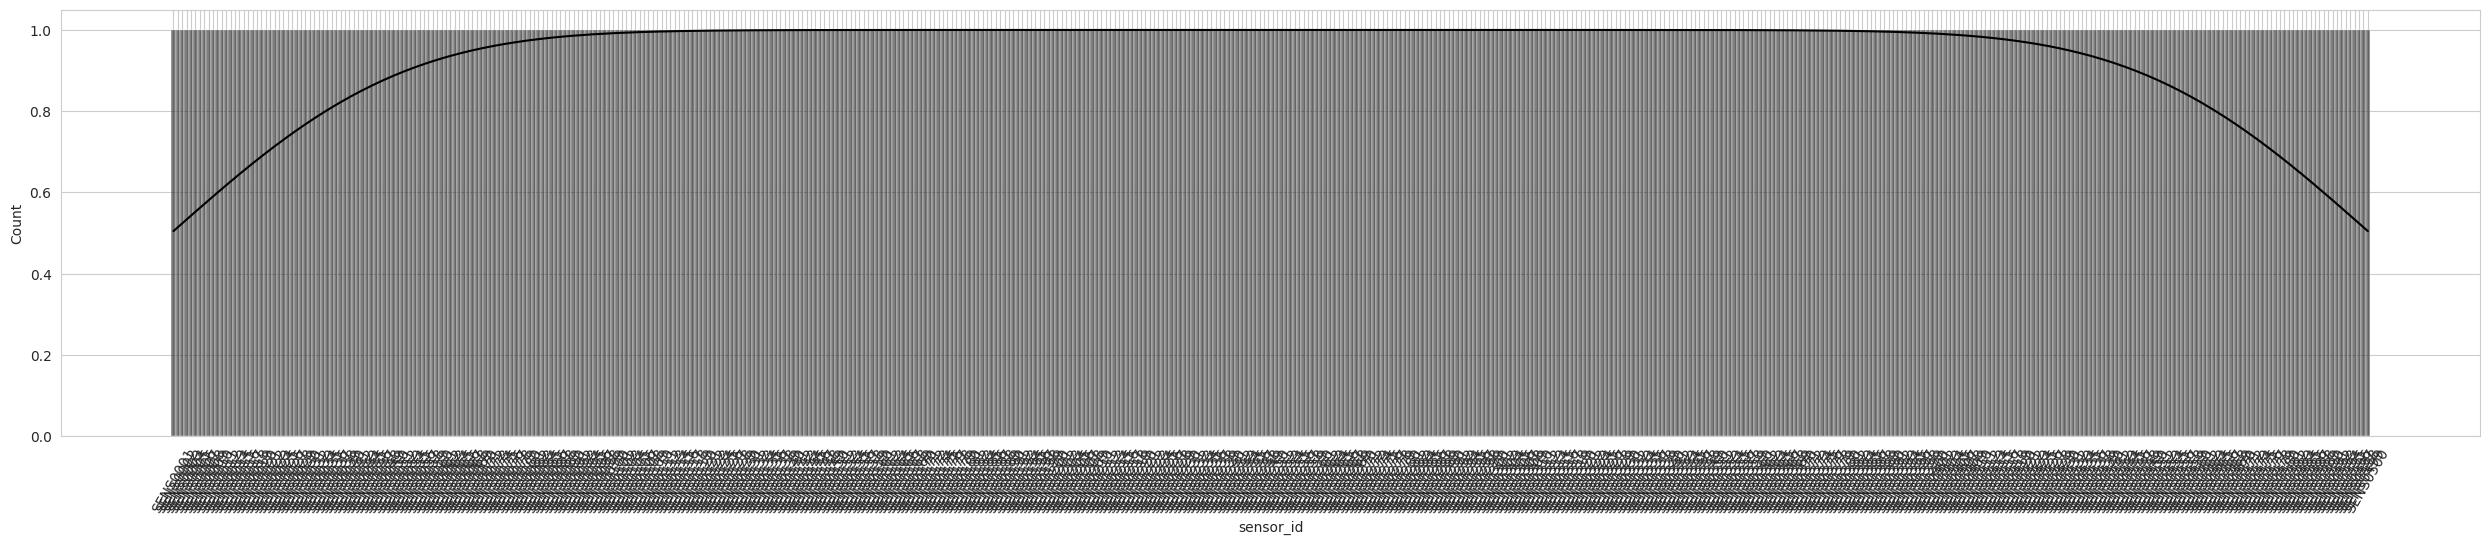

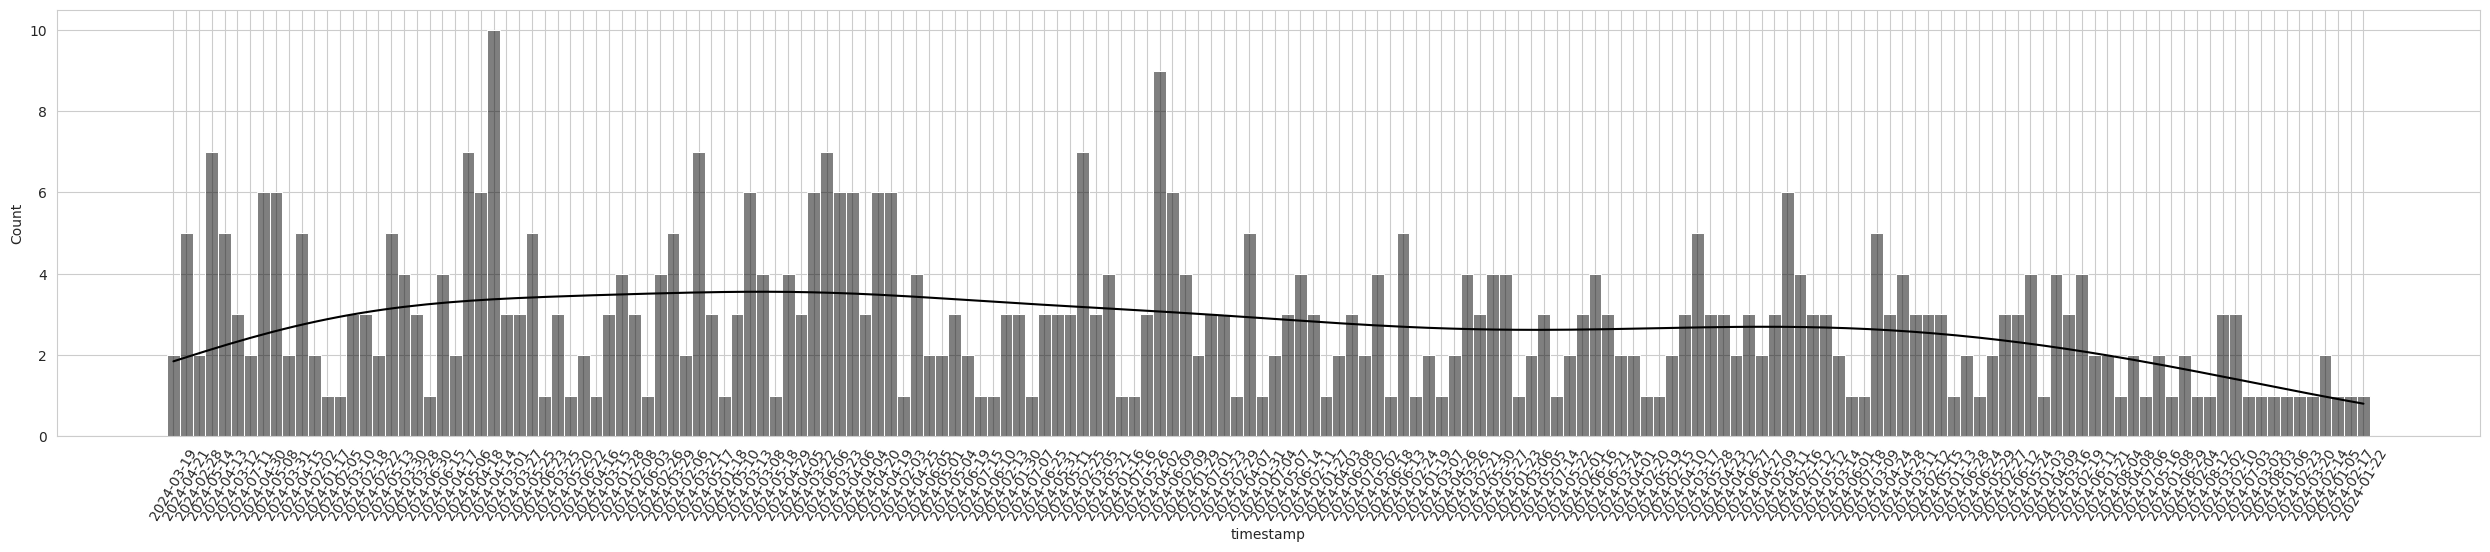

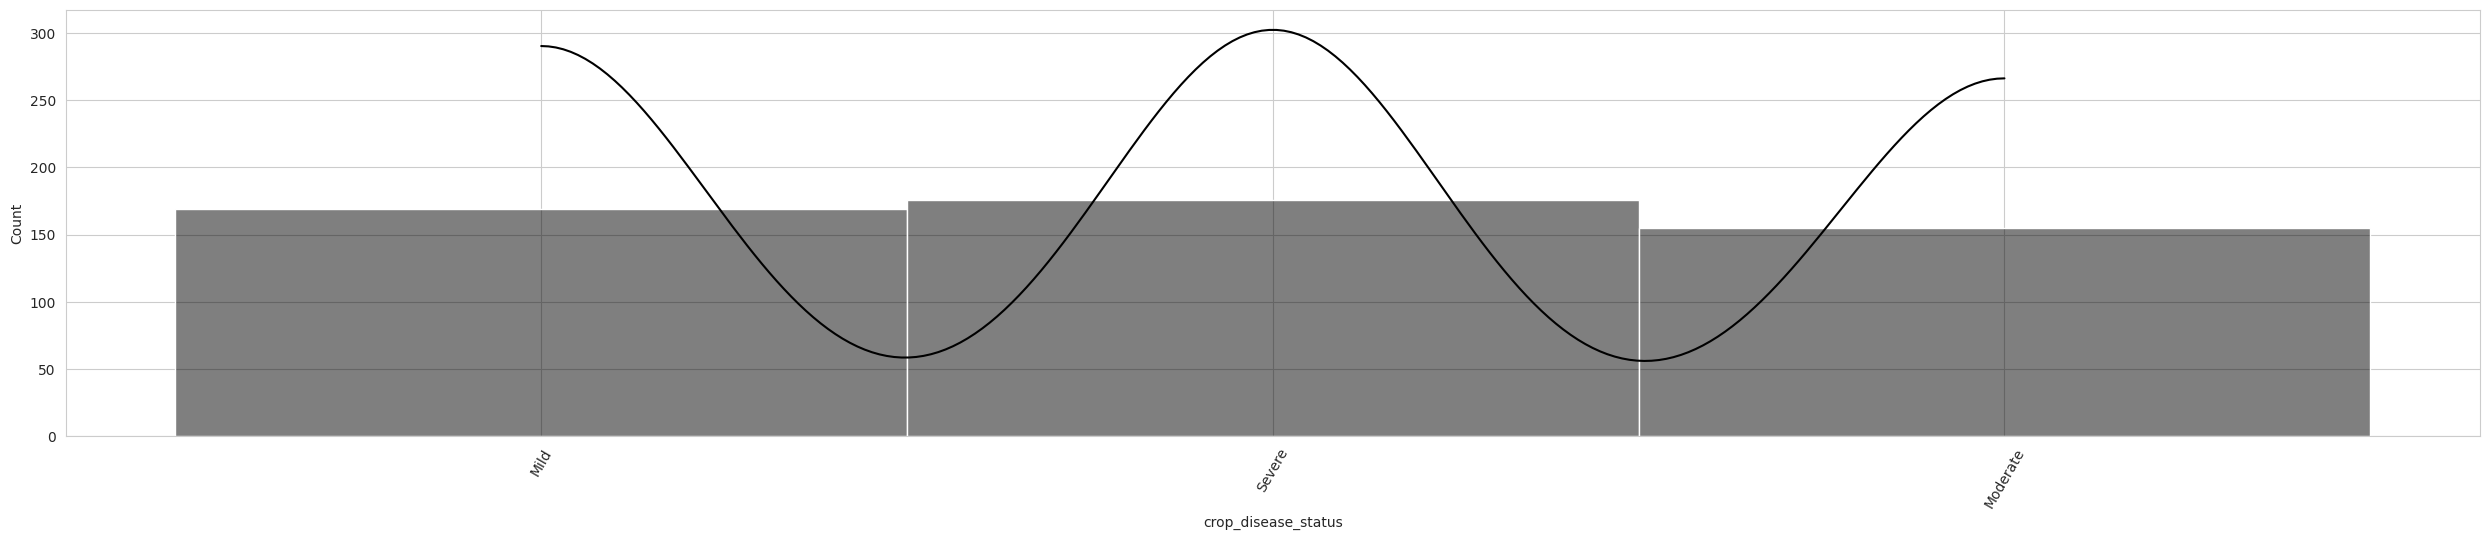

In [11]:
obj_cols = df.select_dtypes(include='object').columns
obj_cols = obj_cols.drop('farm_id','sensor_id')
for features in obj_cols:
    if features in df.columns:
        plt.figure(figsize=(25,5))
        sns.histplot(df[features].dropna(),kde=True,color='black')
        plt.tight_layout()
        plt.xticks(rotation=60)
        plt.show()

# CORRELATION MATRIX

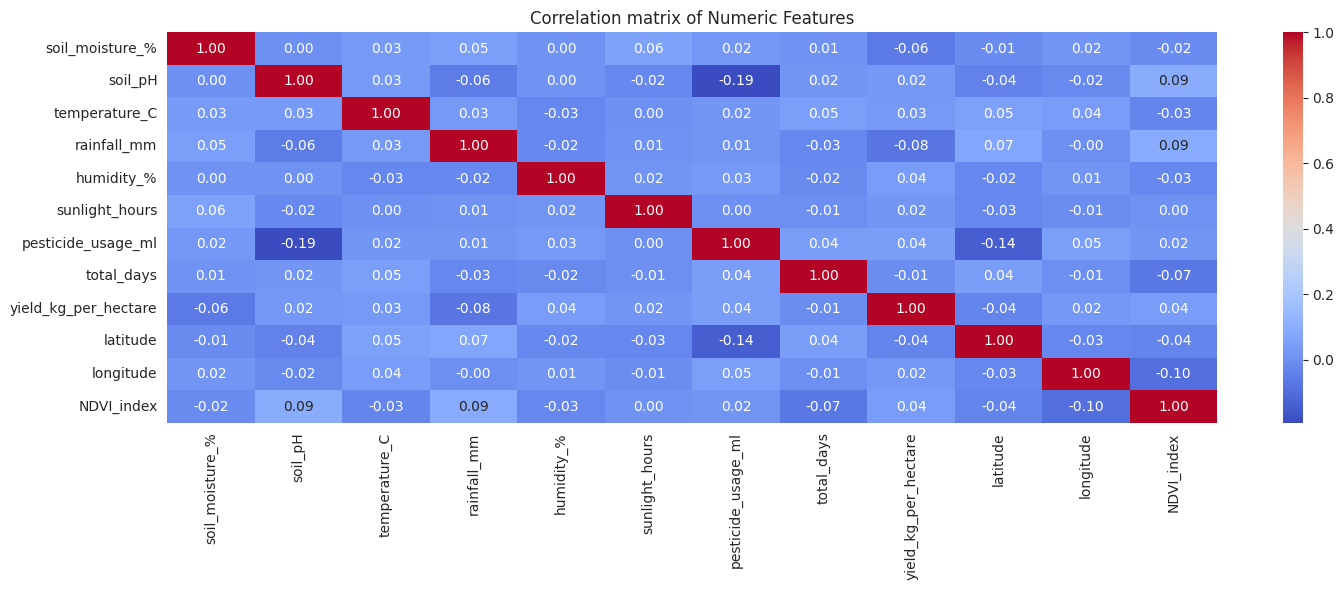

In [12]:
numeric_cols = df.select_dtypes(include=[np.number])
if numeric_cols.shape[1] >=4:
    plt.figure(figsize=(15,6))
    correlation_matrix = numeric_cols.corr()
    sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
    plt.title(f'Correlation matrix of Numeric Features')
    plt.tight_layout()
    plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
lab_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()

In [15]:
for column in lab_cols:
    df[column] = le.fit_transform(df[column])

In [16]:
df.head()

,farm_id,region,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,...,sowing_date,harvest_date,total_days,yield_kg_per_hectare,sensor_id,timestamp,latitude,longitude,NDVI_index,crop_disease_status
0,0,2,4,35.95,5.99,17.79,75.62,77.03,7.27,2,...,7,27,122,4408.07,0,61,14.970941,82.997689,0.63,0
1,1,4,3,19.74,7.24,30.18,89.91,61.13,5.67,2,...,31,43,112,5389.98,1,94,16.613022,70.869009,0.58,0
2,2,4,4,29.32,7.16,27.37,265.43,68.87,8.23,0,...,30,74,144,2931.16,2,43,19.503156,79.068206,0.80,0
3,3,0,1,17.33,6.03,33.73,212.01,70.46,5.03,2,...,48,82,134,4227.80,3,115,31.071298,85.519998,0.44,2
4,4,0,0,19.37,5.92,33.86,269.09,55.73,7.93,0,...,32,38,105,4979.96,4,86,16.568540,81.691720,0.84,2


In [17]:
df = df.astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   farm_id               500 non-null    int64
 1   region                500 non-null    int64
 2   crop_type             500 non-null    int64
 3   soil_moisture_%       500 non-null    int64
 4   soil_pH               500 non-null    int64
 5   temperature_C         500 non-null    int64
 6   rainfall_mm           500 non-null    int64
 7   humidity_%            500 non-null    int64
 8   sunlight_hours        500 non-null    int64
 9   irrigation_type       500 non-null    int64
 10  fertilizer_type       500 non-null    int64
 11  pesticide_usage_ml    500 non-null    int64
 12  sowing_date           500 non-null    int64
 13  harvest_date          500 non-null    int64
 14  total_days            500 non-null    int64
 15  yield_kg_per_hectare  500 non-null    int64
 16  sensor_i

# MODEL SECTION

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Adamax
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Dropout
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,f1_score

2025-04-19 08:32:25.779510: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745051546.023100      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745051546.096297      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [20]:
print(obj_cols)

Index(['region', 'crop_type', 'irrigation_type', 'fertilizer_type',
       'sowing_date', 'harvest_date', 'sensor_id', 'timestamp',
       'crop_disease_status'],
      dtype='object')


In [21]:
print(num_cols)

Index(['soil_moisture_%', 'soil_pH', 'temperature_C', 'rainfall_mm',
       'humidity_%', 'sunlight_hours', 'pesticide_usage_ml', 'total_days',
       'yield_kg_per_hectare', 'latitude', 'longitude', 'NDVI_index'],
      dtype='object')


In [22]:
X = df.drop(columns=['crop_disease_status','sowing_date', 'harvest_date', 'sensor_id', 'timestamp'],axis=1)
y = df['crop_disease_status']

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# SCALEING

In [24]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [25]:
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.fit_transform(X_test_scaled)

In [26]:
print("X_train_pca shape:", X_train_pca.shape)
print("y_train shape:", y_train.shape)
print("X_test_pca shape:", X_test_pca.shape)
print("y_test shape:", y_test.shape)

X_train_pca shape: (400, 15)
y_train shape: (400,)
X_test_pca shape: (100, 15)
y_test shape: (100,)


In [27]:
X_train_pca.shape  # likely (n_samples, 14)


(400, 15)

# MODLE TRAIN AND RESULTS

In [28]:
num_classes = len(np.unique(y_train))

model = Sequential()
model.add(Dense(128,input_shape=(X_train_pca.shape[1],),activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,input_shape=(X_train_pca.shape[1],),activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32,activation='tanh'))
model.add(Dense(num_classes,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

lr_scheduler = ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=3,min_lr=0.0001)
model.fit(X_train_pca,y_train,epochs=100,batch_size=32,validation_data =(X_test_pca,y_test),callbacks=[lr_scheduler])

2025-04-19 08:32:43.192904: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.3160 - loss: 1.1515 - val_accuracy: 0.3700 - val_loss: 1.1091 - learning_rate: 0.0010
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3487 - loss: 1.0940 - val_accuracy: 0.2700 - val_loss: 1.1038 - learning_rate: 0.0010
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3687 - loss: 1.1026 - val_accuracy: 0.3100 - val_loss: 1.1058 - learning_rate: 0.0010
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3895 - loss: 1.0688 - val_accuracy: 0.2900 - val_loss: 1.1059 - learning_rate: 0.0010
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3458 - loss: 1.0923 - val_accuracy: 0.2400 - val_loss: 1.1060 - learning_rate: 0.0010
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4250 - loss: 1.0655 - val_accuracy: 0.2700 - val_loss: 1.1084 - learning_rate: 5.0000e-04
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4142 - loss: 1.0821 - va

In [29]:
y_pred_probs = model.predict(X_test_pca)
y_pred_labels = np.argmax(y_pred_probs,axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [30]:
print("Accuracy:",accuracy_score(y_test,y_pred_labels))
print("Precision (macro)",precision_score(y_test,y_pred_labels,average='macro'))
print("Recall (macro)",recall_score(y_test,y_pred_labels,average='macro'))
print("F1 Score (macro)",f1_score(y_test,y_pred_labels,average='macro'))

print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred_labels))
print("\nClassification Report:\n",classification_report(y_test,y_pred_labels))

Accuracy: 0.36
Precision (macro) 0.36350649350649356
Recall (macro) 0.3619257086999022
F1 Score (macro) 0.3515358604228234

Confusion Matrix:
 [[ 9  9 18]
 [ 8  9 14]
 [11  4 18]]

Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.25      0.28        36
           1       0.41      0.29      0.34        31
           2       0.36      0.55      0.43        33

    accuracy                           0.36       100
   macro avg       0.36      0.36      0.35       100
weighted avg       0.36      0.36      0.35       100



In [31]:
df['crop_type'].value_counts(normalize=True)

crop_type
1    0.222
3    0.216
0    0.214
4    0.184
2    0.164
Name: proportion, dtype: float64

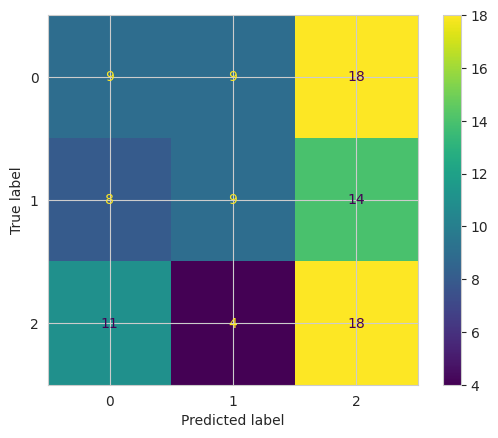

In [32]:
cm = confusion_matrix(y_test, y_pred_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()


In [33]:
df

,farm_id,region,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,...,sowing_date,harvest_date,total_days,yield_kg_per_hectare,sensor_id,timestamp,latitude,longitude,NDVI_index,crop_disease_status
0,0,2,4,35,5,17,75,77,7,2,...,7,27,122,4408,0,61,14,82,0,0
1,1,4,3,19,7,30,89,61,5,2,...,31,43,112,5389,1,94,16,70,0,0
2,2,4,4,29,7,27,265,68,8,0,...,30,74,144,2931,2,43,19,79,0,0
3,3,0,1,17,6,33,212,70,5,2,...,48,82,134,4227,3,115,31,85,0,2
4,4,0,0,19,5,33,269,55,7,0,...,32,38,105,4979,4,86,16,81,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,0,2,42,6,30,52,79,7,1,...,15,50,138,4251,495,109,30,76,0,0
496,496,2,3,34,6,17,256,45,5,0,...,0,3,104,3708,496,8,18,75,0,2
497,497,2,0,15,5,17,288,57,7,0,...,1,27,128,2604,497,93,23,81,0,0
498,498,0,3,38,6,17,279,73,9,0,...,24,52,131,2586,498,46,19,84,0,2


# Final plot

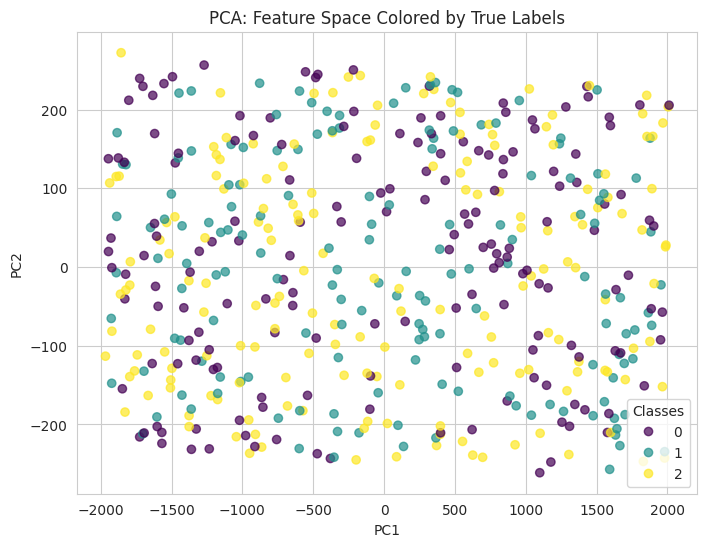

In [34]:
# Reduce dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title("PCA: Feature Space Colored by True Labels")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.grid(True)
plt.show()


# CONCLUSION:
> Getting poor results, probably need to more fine-tuening, better Feaature Engineering.
>
> Imbalanced in data
>
> **I am working on it to improve the results, give some suggestion where i can.......**.